In [1]:
# importation of libaries
import pandas as pd
import numpy as np
import sklearn

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set()
sns.set(style="darkgrid")
plt.rcParams['figure.figsize']=(10,10)

from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

In [2]:
# display of dataset
df = pd.read_csv("weather_data.csv")
df.head(10)

,DateTime,Temperature,Humidity,Light Intensity,Air Quality,Weather Condition,Air-quality Condition
0,01/01/2022 00:00,30.0,90.6,1000.0,68.3,Rainy,Hazardous
1,01/01/2022 00:05,27.4,74.1,470.4,48.9,Rainy,Good
2,01/01/2022 00:10,30.6,61.7,153.6,42.7,Rainy,Good
3,01/01/2022 00:15,34.1,61.1,603.0,46.4,Rainy,Good
4,01/01/2022 00:20,27.1,71.6,487.3,64.4,Rainy,Hazardous
5,01/01/2022 00:25,27.1,59.2,531.5,57.8,Clear,Hazardous
6,01/01/2022 00:30,34.3,80.9,530.5,56.8,Rainy,Hazardous
7,01/01/2022 00:35,31.1,77.0,624.1,43.6,Rainy,Good
8,01/01/2022 00:40,26.1,75.5,239.9,55.9,Rainy,Hazardous
9,01/01/2022 00:45,30.2,68.8,712.3,56.9,Rainy,Hazardous


In [3]:
df.info() # check information

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200000 entries, 0 to 199999
Data columns (total 7 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   DateTime               200000 non-null  object 
 1   Temperature            200000 non-null  float64
 2   Humidity               200000 non-null  float64
 3   Light Intensity        200000 non-null  float64
 4   Air Quality            200000 non-null  float64
 5   Weather Condition      200000 non-null  object 
 6   Air-quality Condition  200000 non-null  object 
dtypes: float64(4), object(3)
memory usage: 10.7+ MB


In [4]:
df.isna().sum() # checking missing values

DateTime                 0
Temperature              0
Humidity                 0
Light Intensity          0
Air Quality              0
Weather Condition        0
Air-quality Condition    0
dtype: int64

In [5]:
df.describe()  # checking statistics of data set

,Temperature,Humidity,Light Intensity,Air Quality
count,200000.000000,200000.000000,200000.000000,200000.000000
mean,28.010591,74.972482,499.119894,50.025963
std,3.973072,9.953205,198.028082,10.004487
min,18.000000,30.900000,0.000000,6.800000
25%,25.300000,68.200000,363.700000,43.300000
50%,28.000000,75.000000,499.200000,50.000000
75%,30.700000,81.700000,634.700000,56.800000
max,40.000000,100.000000,1000.000000,245.000000


In [6]:
import datetime 
df['DateTime'] = pd.to_datetime(df['DateTime'], format='%d/%m/%Y %H:%M')

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200000 entries, 0 to 199999
Data columns (total 7 columns):
 #   Column                 Non-Null Count   Dtype         
---  ------                 --------------   -----         
 0   DateTime               200000 non-null  datetime64[ns]
 1   Temperature            200000 non-null  float64       
 2   Humidity               200000 non-null  float64       
 3   Light Intensity        200000 non-null  float64       
 4   Air Quality            200000 non-null  float64       
 5   Weather Condition      200000 non-null  object        
 6   Air-quality Condition  200000 non-null  object        
dtypes: datetime64[ns](1), float64(4), object(2)
memory usage: 10.7+ MB


In [8]:
df['year'] = pd.to_datetime(df['DateTime']).dt.year
df['month'] = pd.to_datetime(df['DateTime']).dt.month
df['day'] = pd.to_datetime(df['DateTime']).dt.day

In [9]:
df.head()

,DateTime,Temperature,Humidity,Light Intensity,Air Quality,Weather Condition,Air-quality Condition,year,month,day
0,2022-01-01 00:00:00,30.0,90.6,1000.0,68.3,Rainy,Hazardous,2022,1,1
1,2022-01-01 00:05:00,27.4,74.1,470.4,48.9,Rainy,Good,2022,1,1
2,2022-01-01 00:10:00,30.6,61.7,153.6,42.7,Rainy,Good,2022,1,1
3,2022-01-01 00:15:00,34.1,61.1,603.0,46.4,Rainy,Good,2022,1,1
4,2022-01-01 00:20:00,27.1,71.6,487.3,64.4,Rainy,Hazardous,2022,1,1


In [10]:
df.drop(['DateTime'],axis=1, inplace=True)

In [11]:
df.head()

,Temperature,Humidity,Light Intensity,Air Quality,Weather Condition,Air-quality Condition,year,month,day
0,30.0,90.6,1000.0,68.3,Rainy,Hazardous,2022,1,1
1,27.4,74.1,470.4,48.9,Rainy,Good,2022,1,1
2,30.6,61.7,153.6,42.7,Rainy,Good,2022,1,1
3,34.1,61.1,603.0,46.4,Rainy,Good,2022,1,1
4,27.1,71.6,487.3,64.4,Rainy,Hazardous,2022,1,1


Non-numeric columns: Index(['Weather Condition', 'Air-quality Condition'], dtype='object')


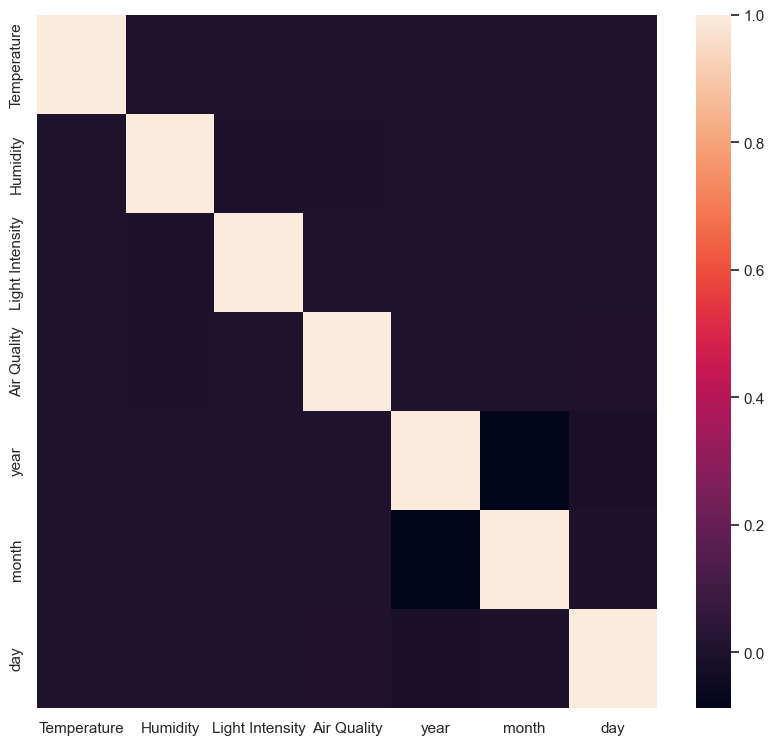

In [12]:
# Assuming df is your DataFrame
# Identify non-numeric columns
non_numeric_cols = df.select_dtypes(exclude=['number']).columns

# Optionally, print non-numeric columns
print("Non-numeric columns:", non_numeric_cols)

# Drop non-numeric columns
df_numeric = df.drop(columns=non_numeric_cols)

# Now you can calculate the correlation and plot the heatmap
plt.figure(figsize=(10,9))
sns.heatmap(df_numeric.corr(), annot=False)
plt.show()

<Axes: xlabel='Weather Condition', ylabel='Temperature'>

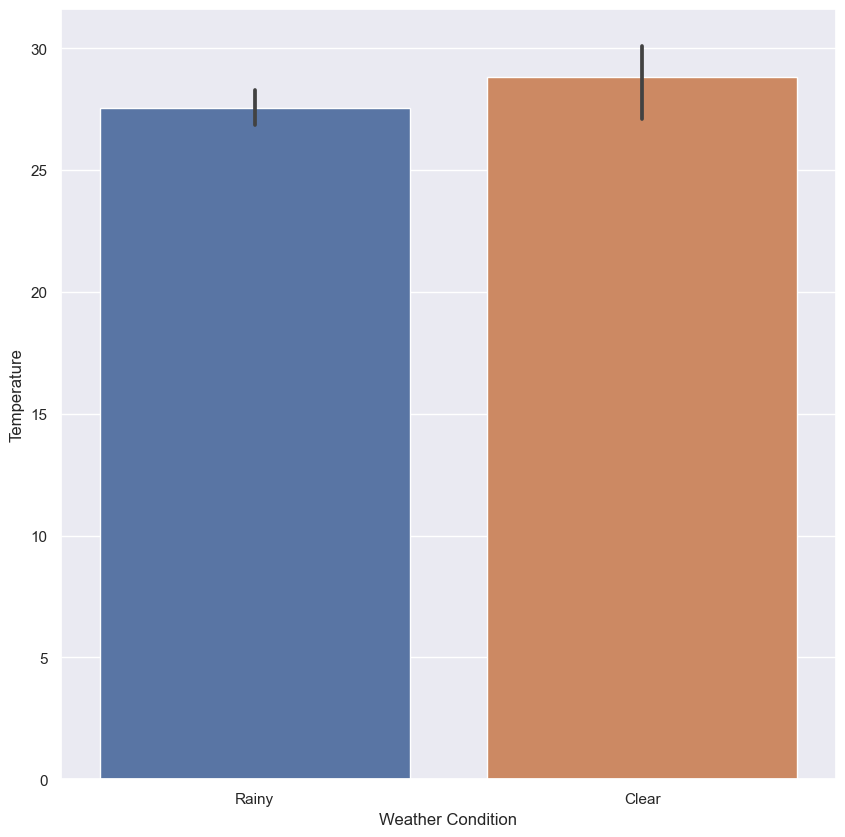

In [13]:
sns.barplot(y="Temperature", x="Weather Condition",data= df[:100] , orient = "vertical")

<Axes: xlabel='Weather Condition', ylabel='Humidity'>

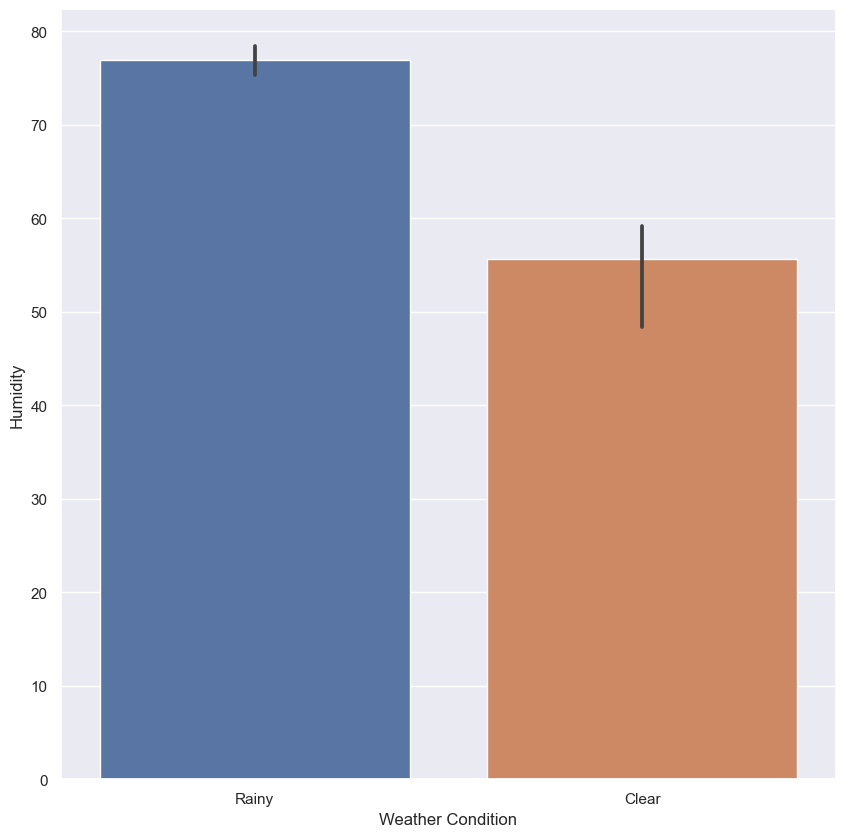

In [14]:
sns.barplot(y="Humidity", x="Weather Condition",data= df[:100] , orient = "vertical")

<Axes: xlabel='Weather Condition', ylabel='Light Intensity'>

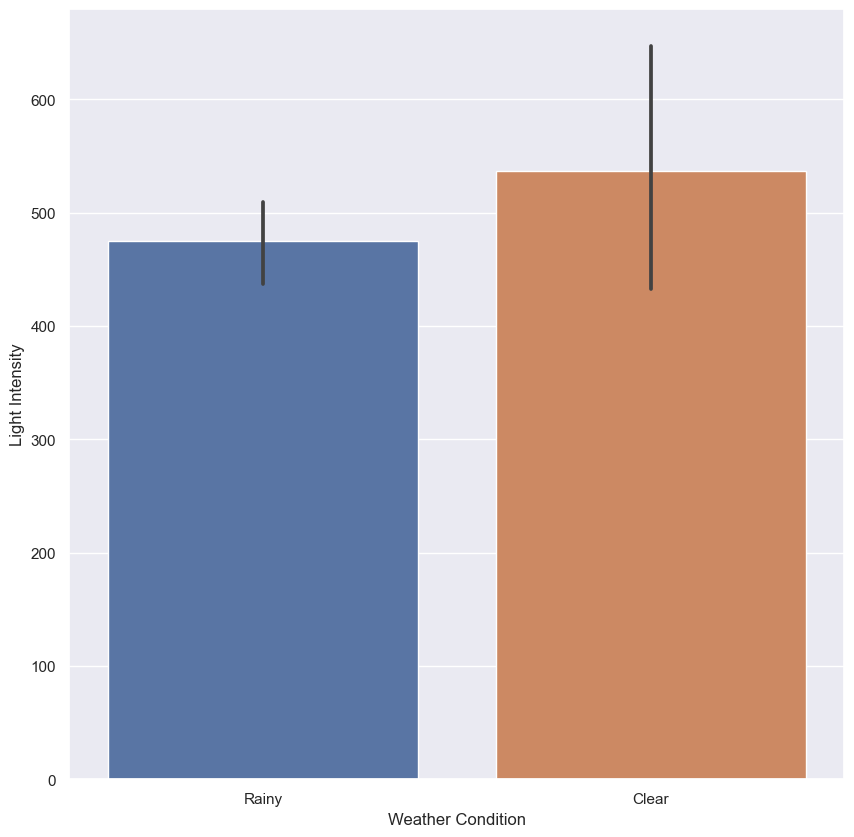

In [15]:
sns.barplot(y="Light Intensity", x="Weather Condition",data= df[:100] , orient = "vertical")

<Axes: xlabel='Air-quality Condition', ylabel='Air Quality'>

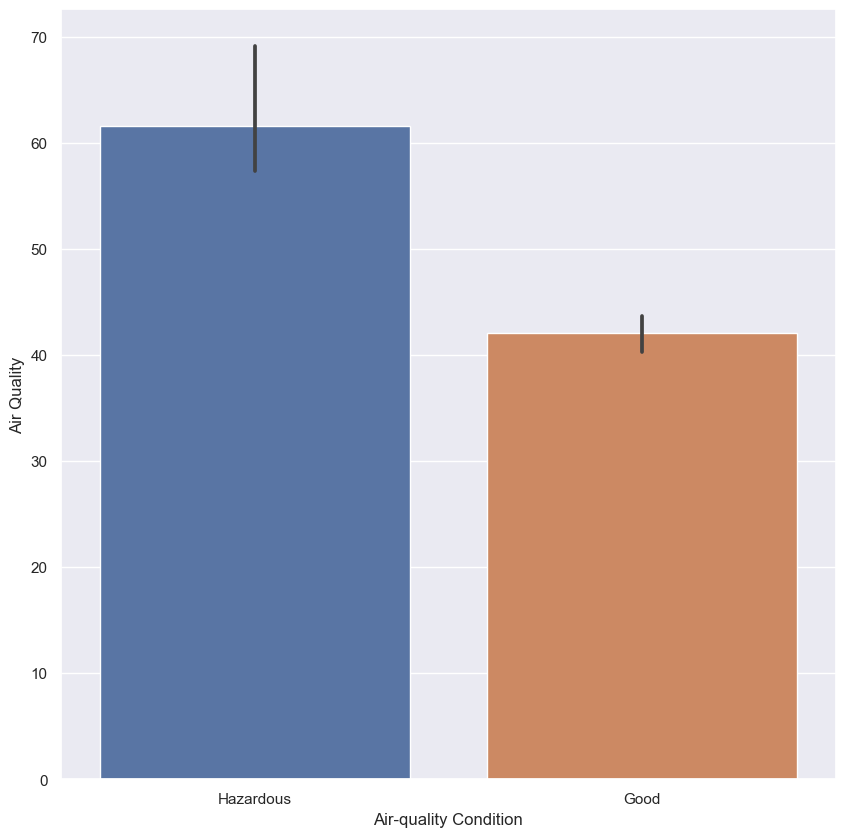

In [16]:
sns.barplot(y="Air Quality", x="Air-quality Condition",data= df[:100] , orient = "vertical")

In [17]:
# Label Encoding
cat_features = ["Weather Condition","Air-quality Condition"]

for cat_feature in cat_features:
    df[f"{cat_feature}_cat"] = df[cat_feature].astype('category')
    df[f"{cat_feature}_cat"] = df[f"{cat_feature}_cat"].cat.codes

df.head()

,Temperature,Humidity,Light Intensity,Air Quality,Weather Condition,Air-quality Condition,year,month,day,Weather Condition_cat,Air-quality Condition_cat
0,30.0,90.6,1000.0,68.3,Rainy,Hazardous,2022,1,1,1,1
1,27.4,74.1,470.4,48.9,Rainy,Good,2022,1,1,1,0
2,30.6,61.7,153.6,42.7,Rainy,Good,2022,1,1,1,0
3,34.1,61.1,603.0,46.4,Rainy,Good,2022,1,1,1,0
4,27.1,71.6,487.3,64.4,Rainy,Hazardous,2022,1,1,1,1


In [18]:
df.drop(["Weather Condition","Air-quality Condition"], axis= 1, inplace =True)

In [19]:
X = df[['Light Intensity','Air Quality']]
y = df[['Air-quality Condition_cat']]

In [20]:
sc = StandardScaler()

In [21]:
X_normalize = pd.DataFrame(sc.fit_transform(X), columns = X.columns)
X_normalize

,Light Intensity,Air Quality
0,2.529345,1.826589
1,-0.145030,-0.112546
2,-1.744807,-0.732270
3,0.524574,-0.362435
4,-0.059688,1.436763
...,...,...
199995,0.116045,-1.002149
199996,-0.787365,1.876566
199997,-0.146545,0.976968
199998,-0.084937,0.077369


In [22]:
X.shape

(200000, 2)

In [23]:
X_df_train, X_df_test, y_df_train, y_df_test = train_test_split(X_normalize, y, test_size=0.2, stratify=y, random_state= 42)

In [24]:
y_df_train.value_counts(normalize=True)

Air-quality Condition_cat
0                            0.500169
1                            0.499831
Name: proportion, dtype: float64

In [25]:
y_df_test.value_counts(normalize=True)

Air-quality Condition_cat
0                            0.500175
1                            0.499825
Name: proportion, dtype: float64

In [26]:
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(verbose=3,random_state=42,n_estimators=42)
clf.fit(X_df_train, y_df_train)

/var/folders/ws/503klr8x1mg50ln159bwt6k80000gp/T/ipykernel_3027/241440053.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  clf.fit(X_df_train, y_df_train)
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.1s remaining:    0.0s


building tree 1 of 42
building tree 2 of 42
building tree 3 of 42
building tree 4 of 42
building tree 5 of 42
building tree 6 of 42
building tree 7 of 42
building tree 8 of 42
building tree 9 of 42
building tree 10 of 42
building tree 11 of 42
building tree 12 of 42
building tree 13 of 42
building tree 14 of 42
building tree 15 of 42
building tree 16 of 42
building tree 17 of 42
building tree 18 of 42
building tree 19 of 42
building tree 20 of 42
building tree 21 of 42
building tree 22 of 42
building tree 23 of 42
building tree 24 of 42
building tree 25 of 42
building tree 26 of 42
building tree 27 of 42
building tree 28 of 42
building tree 29 of 42
building tree 30 of 42
building tree 31 of 42
building tree 32 of 42
building tree 33 of 42
building tree 34 of 42
building tree 35 of 42
building tree 36 of 42
building tree 37 of 42
building tree 38 of 42
building tree 39 of 42
building tree 40 of 42
building tree 41 of 42
building tree 42 of 42


[Parallel(n_jobs=1)]: Done  42 out of  42 | elapsed:    2.6s finished


RandomForestClassifier(n_estimators=42, random_state=42, verbose=3)

In [27]:
y_pred = clf.predict(X_df_test)
y_pred

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  42 out of  42 | elapsed:    0.1s finished


array([1, 1, 0, ..., 1, 0, 0], dtype=int8)

In [28]:
from sklearn.metrics import f1_score, accuracy_score

# we are using f1_score because 
# this is a classification model

y_pred = clf.predict(X_df_test)

print("F1_score", f1_score(y_df_test,y_pred))
print("accuracy" , accuracy_score(y_df_test,y_pred))

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s


F1_score 1.0
accuracy 1.0


[Parallel(n_jobs=1)]: Done  42 out of  42 | elapsed:    0.1s finished


In [29]:
from sklearn.linear_model import LogisticRegression

clf = LogisticRegression(random_state=20, class_weight="balanced")
clf.fit(X_df_train, y_df_train)

from sklearn.metrics import f1_score, accuracy_score

# we are using f1_score because 
# this is a classification model

y_pred = clf.predict(X_df_test)

print("F1_score", f1_score(y_df_test,y_pred))
print("accuracy" , accuracy_score(y_df_test,y_pred))

/opt/anaconda3/lib/python3.11/site-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


F1_score 1.0
accuracy 1.0


In [30]:
from sklearn.dummy import DummyClassifier

clf = DummyClassifier()
clf.fit(X_df_train, y_df_train)

from sklearn.metrics import f1_score, accuracy_score

# We are using f1_score because 
# This is a classification model

y_pred = clf.predict(X_df_test)

print("F1_score", f1_score(y_df_test,y_pred))
print("accuracy" , accuracy_score(y_df_test,y_pred))

F1_score 0.0
accuracy 0.500175


In [31]:
from sklearn.tree import DecisionTreeClassifier

clf = DecisionTreeClassifier(max_depth=11,random_state =42)
clf.fit(X_df_train, y_df_train)
y_pred = clf.predict(X_df_test)

print("F1_score", f1_score(y_df_test,y_pred))
print("accuracy" , accuracy_score(y_df_test,y_pred))

F1_score 1.0
accuracy 1.0


In [32]:
from sklearn.svm import SVC

clf = SVC()
clf.fit(X_df_train, y_df_train)
y_pred = clf.predict(X_df_test)

print("F1_score", f1_score(y_df_test,y_pred))
print("accuracy" , accuracy_score(y_df_test,y_pred))

/opt/anaconda3/lib/python3.11/site-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


F1_score 0.9998749718686705
accuracy 0.999875


In [68]:
data = {"Models":['DummyClassifier','SVC', 'RandomForestClassifier'], "F1 score=":[0.0,0.99,1.0]}

df = pd.DataFrame(data)
df

,Models,F1 score=
0,DummyClassifier,0.00
1,SVC,0.99
2,RandomForestClassifier,1.00
